# 1. Data Preparation:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path ="D:\Assignments Data Science ExcelR\Decision Tree\Decision Tree\heart_disease.xlsx"
sheet_name = 'Heart_disease'
df = pd.read_excel(file_path , sheet_name=sheet_name)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


# 2. Exploratory Data Analysis (EDA):

In [4]:
# Check for missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [5]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
df.shape

(908, 13)

In [7]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

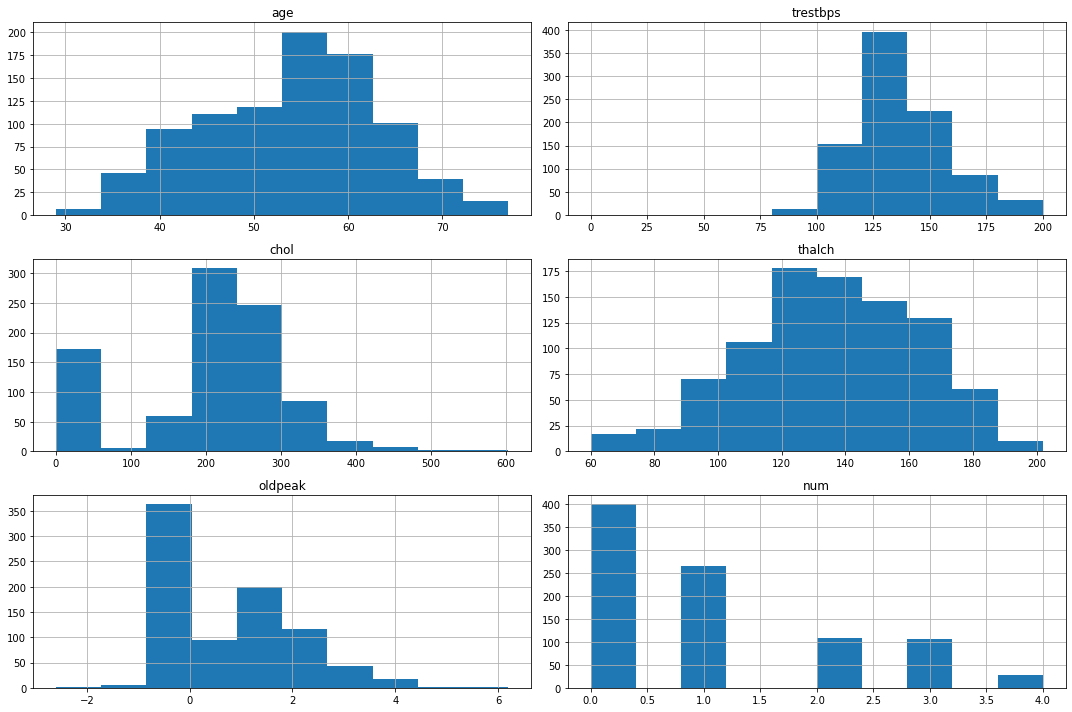

In [8]:
# Visualize the distribution of features
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

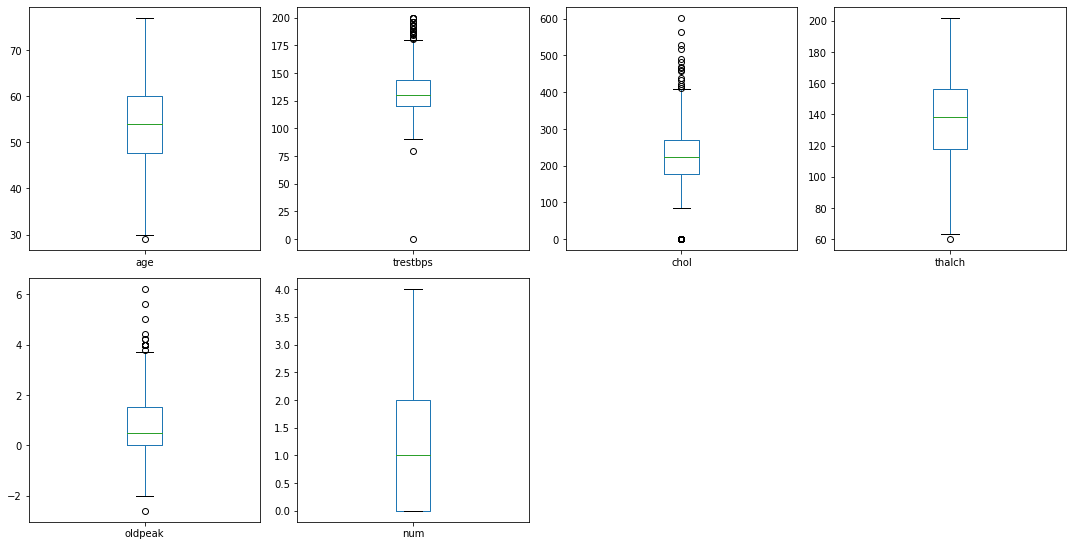

In [9]:
# Box plots to check for outliers
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 15))
plt.tight_layout()
plt.show()

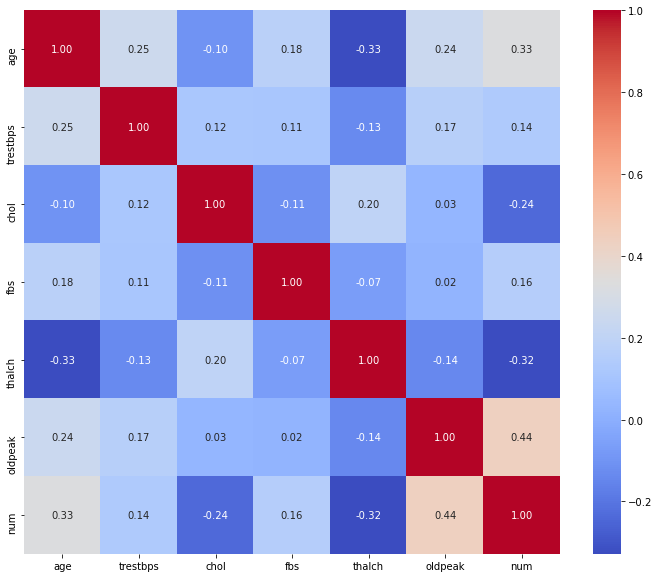

In [10]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# 3. Feature Engineering:


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
# Encode categorical variables (if any)
# In this case, we have 'Gender' and 'cp' which can be considered as categorical variables
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')

In [13]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

In [14]:
# Handle missing values (if any)
# For simplicity, we can fill missing values with the mean of the column
df.fillna(df.mean(), inplace=True)

In [15]:
# Scale numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [16]:
# Display the transformed dataset
df.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.006027,0.567394,0.281297,True,0.524183,1.334996,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,-1.397560,0.076967,0.013526,False,-0.147705,-0.844594,0,1,1,0,0,1,0,0,0,0,1,0,0,0
2,0.350503,0.322181,-0.084656,False,0.449529,-0.465535,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,-0.195767,-0.756760,-0.138211,False,2.017268,-0.844594,0,1,0,0,1,0,0,0,0,0,1,0,0,0
4,0.350503,-1.149102,-0.004325,False,-0.371668,0.576878,0,1,0,0,0,1,0,1,0,0,1,0,0,0


In [17]:
df.isnull().sum()

age                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
oldpeak                     0
num                         0
sex_Male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
exang_FALSE                 0
exang_TURE                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

In [18]:
# Split the dataset into features and target variable
X = df.drop('num', axis=1)
y = df['num']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Display shapes of the resulting datasets
X_train.shape, y_train.shape


((726, 19), (726,))

In [21]:
X_test.shape, y_test.shape

((182, 19), (182,))

# 4. Decision Tree Classification:

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


In [40]:

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

In [41]:

# Train the model on the training set
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [43]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [45]:
# Binarize the output for ROC AUC calculation
n_classes = len(set(y))
y_test_bin = label_binarize(y_test, classes=range(n_classes))

In [46]:
# Compute ROC AUC
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr', average='weighted')


In [47]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.51
Precision: 0.50
Recall: 0.51
F1 Score: 0.50
ROC-AUC Score: 0.64


In [48]:
# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71        89
           1       0.38      0.44      0.40        48
           2       0.29      0.18      0.22        22
           3       0.24      0.29      0.26        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.32      0.32      0.32       182
weighted avg       0.50      0.51      0.50       182



In [49]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[63 20  3  3  0]
 [15 21  4  7  1]
 [ 5  8  4  4  1]
 [ 4  6  2  5  0]
 [ 2  1  1  2  0]]


In [50]:
# ROC Curve
fpr = {}
tpr = {}
roc_auc = {}

In [51]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

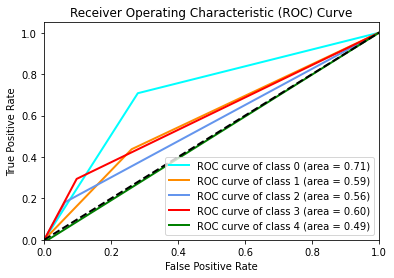

In [52]:
# Plot ROC curve for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 5. Hyperparameter Tuning:


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [54]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 4]
}

In [55]:
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [56]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [57]:
# Get the best model
best_model = grid_search.best_estimator_


In [58]:
# Make predictions with the best model
y_pred = best_model.predict(X_test)


In [59]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best model: {accuracy:.2f}")


Accuracy with best model: 0.57


In [60]:
# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.84      0.77        89
           1       0.39      0.54      0.46        48
           2       0.00      0.00      0.00        22
           3       0.22      0.12      0.15        17
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.26      0.30      0.28       182
weighted avg       0.47      0.57      0.51       182



C:\Users\PRAPANJ K M\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRAPANJ K M\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRAPANJ K M\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 6. Model Evaluation and Analysis:


In [61]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [62]:
# Assuming you have the best_model from the previous hyperparameter tuning step

# Make predictions
y_pred = best_model.predict(X_test)

In [63]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

C:\Users\PRAPANJ K M\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.57
Precision: 0.47
Recall: 0.57
F1 Score: 0.51


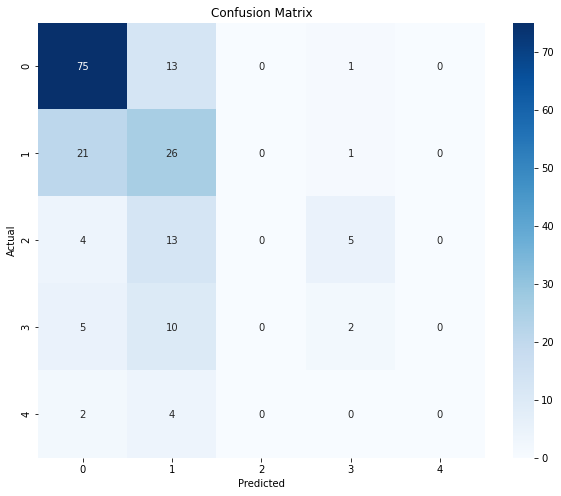

In [65]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

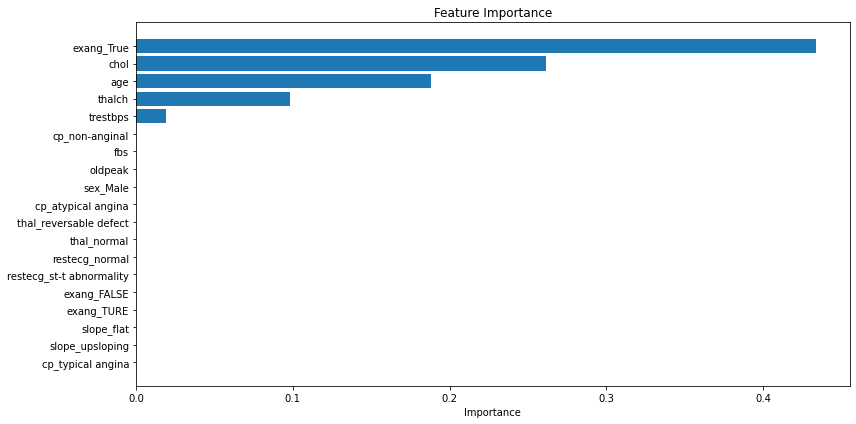

In [66]:
# Feature Importance
feature_importance = best_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

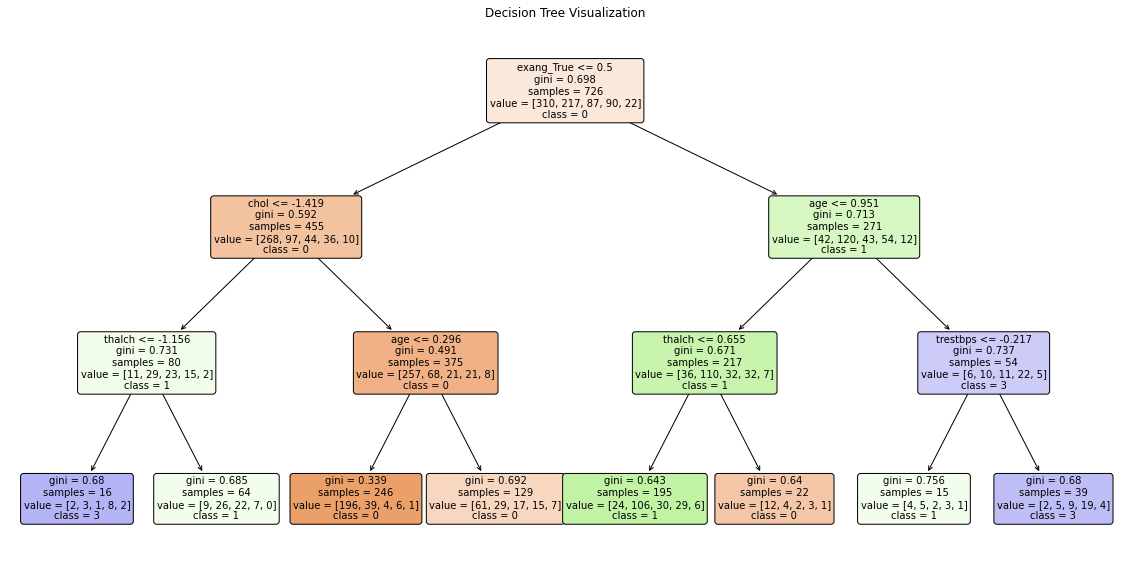

In [67]:

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=feature_names, class_names=best_model.classes_.astype(str), 
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()